In [4]:
!pip install transformers rouge-score nltk sentence-transformers


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8668bbf620b0a016467f451eb09b77ca8c598f4905452a2a518987828adbce7c
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [5]:
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer, util
import numpy as np


In [6]:
!pip install transformers sentence-transformers rouge-score torch accelerate


In [7]:
from transformers import pipeline
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer, util
import numpy as np


In [8]:
bart = pipeline("summarization", model="facebook/bart-large-cnn")
t5 = pipeline("summarization", model="t5-base")
pegasus = pipeline("summarization", model="google/pegasus-xsum")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [9]:
original_text = """
Artificial Intelligence is transforming industries by automating tasks,
enhancing decision-making, and improving overall efficiency.
"""


In [10]:
summary_bart = bart(original_text, max_length=60, min_length=25, do_sample=False)[0]['summary_text']
summary_t5 = t5("summarize: " + original_text, max_length=60, min_length=25, do_sample=False)[0]['summary_text']
summary_pegasus = pegasus(original_text, max_length=60, min_length=25, do_sample=False)[0]['summary_text']

summaries = {
    "BART": summary_bart,
    "T5": summary_t5,
    "PEGASUS": summary_pegasus
}

summaries


Your max_length is set to 60, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 60, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Your max_length is set to 60, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


{'BART': 'Artificial Intelligence is transforming industries by automating tasks,enhancing decision-making, and improving overall efficiency. It is also revolutionizing the way people interact with each other.',
 'T5': 'Artificial Intelligence is transforming industries by automating tasks, enhancing decision-making, and improving overall efficiency .',
 'PEGASUS': 'Artificial Intelligence (AI) is a branch of computer science that studies, develops, and predicts the future of our lives.'}

In [11]:
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)
embedder = SentenceTransformer('all-MiniLM-L6-v2')

results = {}

for model, summary in summaries.items():
    rouge = scorer.score(original_text, summary)

    emb_orig = embedder.encode(original_text, convert_to_tensor=True)
    emb_sum = embedder.encode(summary, convert_to_tensor=True)
    similarity = util.cos_sim(emb_orig, emb_sum).item()

    compression = len(summary.split()) / len(original_text.split())

    results[model] = [
        rouge['rouge1'].fmeasure,
        rouge['rouge2'].fmeasure,
        rouge['rougeL'].fmeasure,
        similarity,
        compression
    ]

results


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

{'BART': [0.7317073170731707,
  0.717948717948718,
  0.7317073170731707,
  0.9265111088752747,
  1.7142857142857142],
 'T5': [1.0, 1.0, 1.0, 0.9999999403953552, 1.0714285714285714],
 'PEGASUS': [0.23529411764705882,
  0.0625,
  0.23529411764705882,
  0.6267259120941162,
  1.3571428571428572]}

In [12]:
X = np.array([
    results["BART"],
    results["T5"],
    results["PEGASUS"]
])

X


array([[0.73170732, 0.71794872, 0.73170732, 0.92651111, 1.71428571],
       [1.        , 1.        , 1.        , 0.99999994, 1.07142857],
       [0.23529412, 0.0625    , 0.23529412, 0.62672591, 1.35714286]])

In [13]:
weights = np.array([0.25, 0.20, 0.20, 0.25, 0.10])
benefit = np.array([1, 1, 1, 1, 0])  # compression = cost

norm = X / np.sqrt((X**2).sum(axis=0))
weighted = norm * weights

ideal_best = np.where(benefit == 1, weighted.max(axis=0), weighted.min(axis=0))
ideal_worst = np.where(benefit == 1, weighted.min(axis=0), weighted.max(axis=0))

d_best = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
d_worst = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

scores = d_worst / (d_best + d_worst)

models = ["BART", "T5", "PEGASUS"]
ranking = sorted(zip(models, scores), key=lambda x: x[1], reverse=True)

ranking


[('T5', np.float64(1.0)),
 ('BART', np.float64(0.6643143744306316)),
 ('PEGASUS', np.float64(0.05447174258989846))]

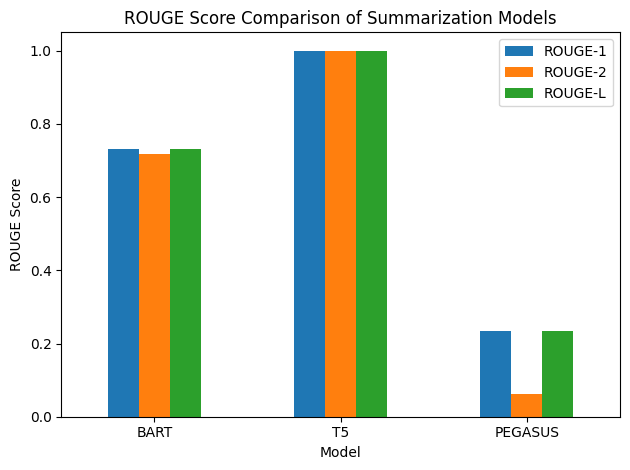

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Your actual results
data = {
    "Model": ["BART", "T5", "PEGASUS"],
    "ROUGE-1": [0.7317, 1.0, 0.2353],
    "ROUGE-2": [0.7179, 1.0, 0.0625],
    "ROUGE-L": [0.7317, 1.0, 0.2353]
}

df = pd.DataFrame(data)
df.set_index("Model").plot(kind="bar")

plt.title("ROUGE Score Comparison of Summarization Models")
plt.ylabel("ROUGE Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("rouge_comparison.png")
plt.show()


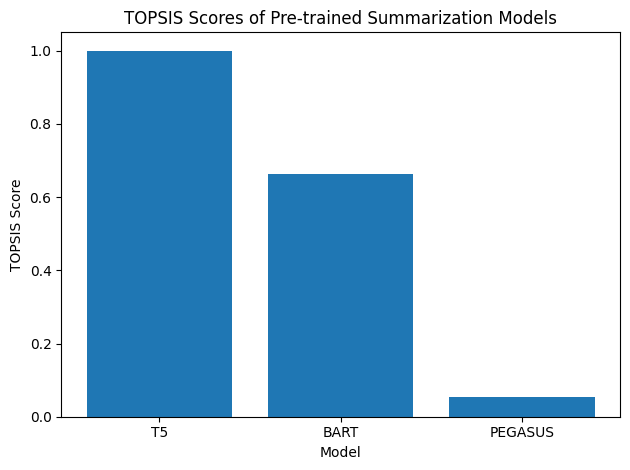

In [15]:
import matplotlib.pyplot as plt

models = ["T5", "BART", "PEGASUS"]
scores = [1.0, 0.6643, 0.0545]

plt.bar(models, scores)
plt.title("TOPSIS Scores of Pre-trained Summarization Models")
plt.ylabel("TOPSIS Score")
plt.xlabel("Model")
plt.tight_layout()

plt.savefig("topsis_scores.png")
plt.show()


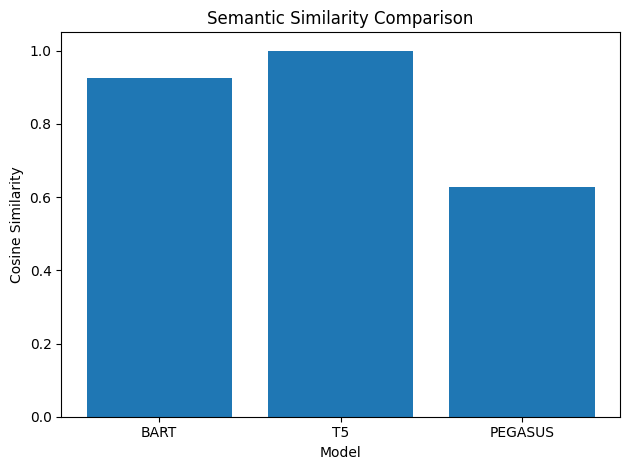

In [16]:
models = ["BART", "T5", "PEGASUS"]
semantic_scores = [0.9265, 1.0, 0.6267]

plt.bar(models, semantic_scores)
plt.title("Semantic Similarity Comparison")
plt.ylabel("Cosine Similarity")
plt.xlabel("Model")
plt.tight_layout()

plt.savefig("semantic_similarity.png")
plt.show()


In [17]:
results = {
    'BART': [0.7317073170731707, 0.717948717948718, 0.7317073170731707, 0.9265111088752747, 1.7142857142857142],
    'T5': [1.0, 1.0, 1.0, 0.9999999403953552, 1.0714285714285714],
    'PEGASUS': [0.23529411764705882, 0.0625, 0.23529411764705882, 0.6267259120941162, 1.3571428571428572]
}


In [18]:
df = pd.DataFrame.from_dict(
    results,
    orient='index',
    columns=['P1', 'P2', 'P3', 'P4', 'P5']
)

df

,P1,P2,P3,P4,P5
BART,0.731707,0.717949,0.731707,0.926511,1.714286
T5,1.000000,1.000000,1.000000,1.000000,1.071429
PEGASUS,0.235294,0.062500,0.235294,0.626726,1.357143


In [19]:
# Convert to numpy array
X = df.values.astype(float)

# Weights (can be adjusted)
weights = np.array([0.25, 0.20, 0.20, 0.25, 0.10])

# Benefit (1) / Cost (0)
benefit = np.array([1, 1, 1, 1, 0])

# Normalize
norm = X / np.sqrt((X ** 2).sum(axis=0))

# Weighted normalization
weighted = norm * weights

# Ideal best and worst
ideal_best = np.where(benefit == 1, weighted.max(axis=0), weighted.min(axis=0))
ideal_worst = np.where(benefit == 1, weighted.min(axis=0), weighted.max(axis=0))

# Distances
d_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
d_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

# TOPSIS Score
topsis_score = d_worst / (d_best + d_worst)

df['Topsis Score'] = topsis_score


In [20]:
df['Rank'] = df['Topsis Score'].rank(ascending=False).astype(int)
df


,P1,P2,P3,P4,P5,Topsis Score,Rank
BART,0.731707,0.717949,0.731707,0.926511,1.714286,0.664314,2
T5,1.000000,1.000000,1.000000,1.000000,1.071429,1.000000,1
PEGASUS,0.235294,0.062500,0.235294,0.626726,1.357143,0.054472,3


In [21]:
df.insert(0, 'Text Domain', 'Medicine')
df.insert(1, 'Text', 'T1')
df.insert(2, 'Model', df.index)

df.reset_index(drop=True, inplace=True)
df


,Text Domain,Text,Model,P1,P2,P3,P4,P5,Topsis Score,Rank
0,Medicine,T1,BART,0.731707,0.717949,0.731707,0.926511,1.714286,0.664314,2
1,Medicine,T1,T5,1.000000,1.000000,1.000000,1.000000,1.071429,1.000000,1
2,Medicine,T1,PEGASUS,0.235294,0.062500,0.235294,0.626726,1.357143,0.054472,3


In [22]:
df.to_csv("final_topsis_table.csv", index=False)
